In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("LoanApprovalPrediction.csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df=df.head(10)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3.0,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2.0,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1.0,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
#Get the number of columns of object datatype.
obj=df.dtypes=='object'
print("Categorical variables: ", len(list(obj[obj].index)))

Categorical variables:  7


In [6]:
#As Loan_ID is completely unique and not correlated with any of the other column, So we will drop it using .drop() function
## Dropping Loan_ID column
df.drop(['Loan_ID'],axis=1,inplace=True)

C:\Users\sonaw\AppData\Local\Temp\ipykernel_13236\4080117228.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Loan_ID'],axis=1,inplace=True)


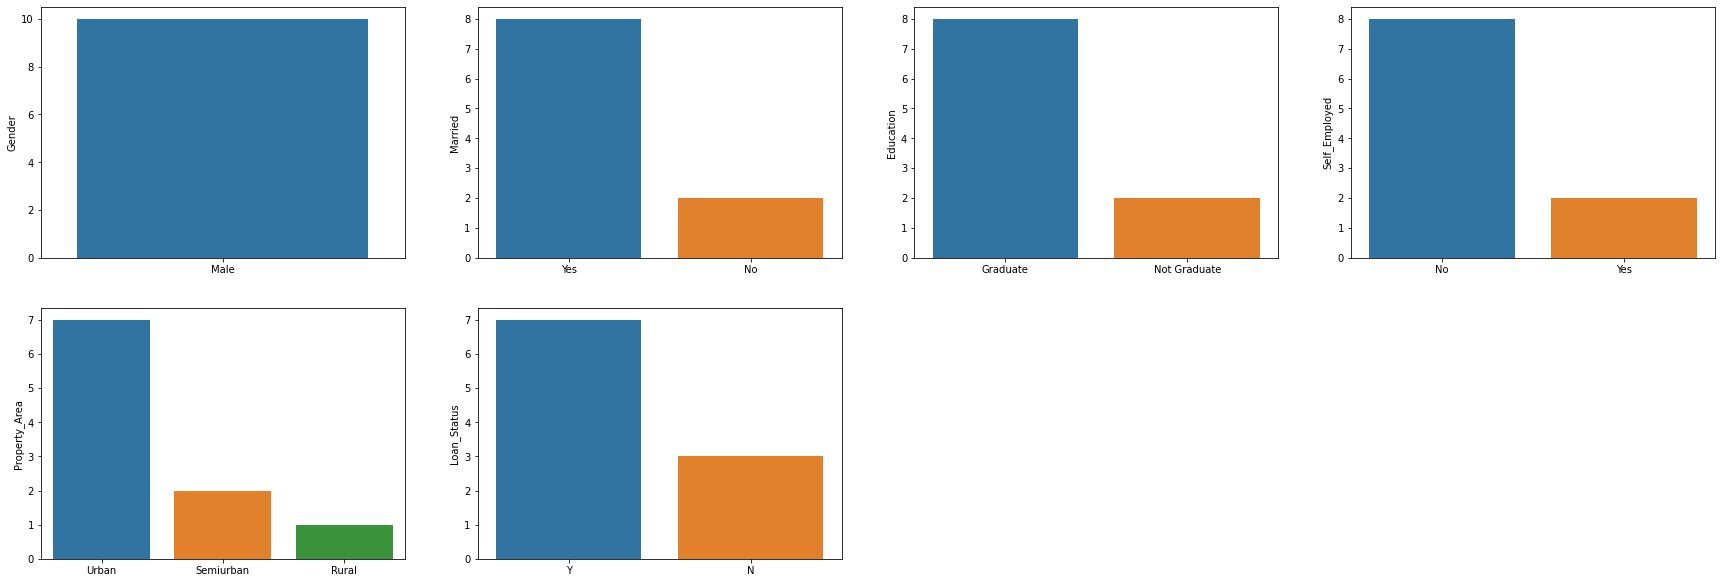

In [7]:
#Visualize all the unique values in columns using barplot. This will simply show which value is dominating as per our dataset.


obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(30,60))
index = 1

for col in object_cols:
  y = df[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=0)
  sns.barplot(x=list(y.index), y=y)
  index +=1 

In [8]:
#As all the categorical values are binary so we can use Label Encoder for all such columns and the values will change into int datatype.

In [9]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how 
# to understand word labels.
label_encoder = preprocessing.LabelEncoder()
obj = (df.dtypes == 'object')
for col in list(obj[obj].index):
 df[col] = label_encoder.fit_transform(df[col])
df[col]

C:\Users\sonaw\AppData\Local\Temp\ipykernel_13236\470630150.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col])


0    1
1    0
2    1
3    1
4    1
5    1
6    1
7    0
8    1
9    0
Name: Loan_Status, dtype: int32

In [10]:
#Again check the object datatype columns. Let's find out if there is still any left.
# To find the number of columns with 
# datatype==object
obj = (df.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


<AxesSubplot:>

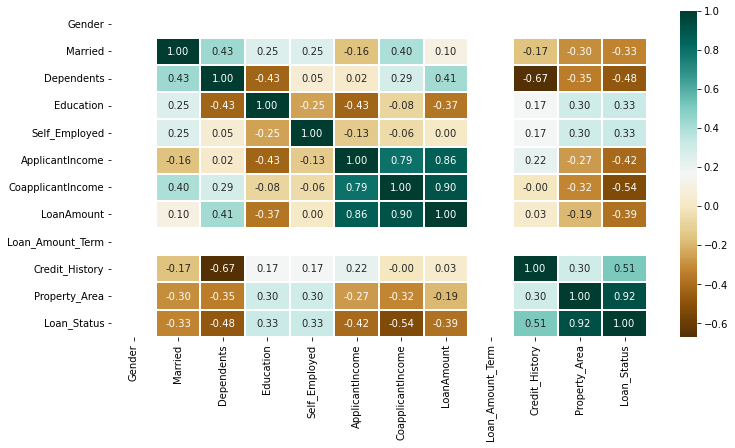

In [11]:
plt.figure(figsize=(12,6))

sns.heatmap(df.corr(),cmap='BrBG',fmt='.2f',
            linewidths=2,annot=True)

The above heatmap is showing the correlation between Loan Amount and ApplicantIncome. It also shows that Credit_History has a high impact on Loan_Status.

Now we will use Catplot to visualize the plot for the Gender, and Marital Status of the applicant.

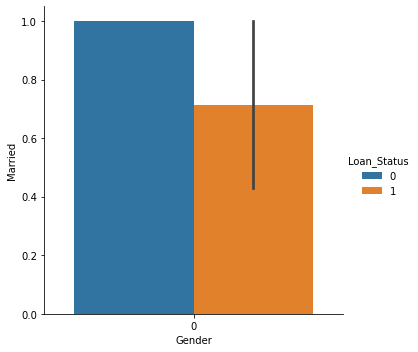

In [13]:
sns.catplot(x="Gender", y="Married",
            hue="Loan_Status", 
            kind="bar", 
            data=df) 

In [14]:
#Now we will find out if there is any missing values in the dataset using below code.
for col in df.columns:
  df[col] = df[col].fillna(df[col].mean()) 
  
df.isna().sum()

C:\Users\sonaw\AppData\Local\Temp\ipykernel_13236\3373818111.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].mean())


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Splitting Dataset 

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop(['Loan_Status'],axis=1)
Y = df['Loan_Status']
X.shape,Y.shape

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.4,
                                                    random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((6, 11), (4, 11), (6,), (4,))

Model Training and Evaluation
As this is a classification problem so we will be using these models : 

KNeighborsClassifiers
RandomForestClassifiers
Support Vector Classifiers (SVC)
Logistics Regression

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators = 7,
                             criterion = 'entropy',
                             random_state =7)
svc = SVC()
lc = LogisticRegression()

# making predictions on the training set
for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_train)
    print("Accuracy score of ",
          clf.__class__.__name__,
          "=",100*metrics.accuracy_score(Y_train, 
                                         Y_pred))

Accuracy score of  RandomForestClassifier = 100.0
Accuracy score of  KNeighborsClassifier = 50.0
Accuracy score of  SVC = 66.66666666666666
Accuracy score of  LogisticRegression = 100.0


In [17]:
#Prediction on the test set:
# making predictions on the testing set
for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print("Accuracy score of ",
          clf.__class__.__name__,"=",
          100*metrics.accuracy_score(Y_test,
                                     Y_pred))

Accuracy score of  RandomForestClassifier = 75.0
Accuracy score of  KNeighborsClassifier = 75.0
Accuracy score of  SVC = 75.0
Accuracy score of  LogisticRegression = 100.0


In [ ]:
LogisticRegression Classifier is giving the best accuracy with an accuracy score of 100% for the testing dataset.